# New regimes of Josephson junction arrays

In [107]:
import JJArray as jja
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt
from scipy.sparse import bmat
from tqdm.notebook import tqdm

# Full Hamiltonian

In [137]:

N = 3
Ncut = 10


EC = np.full((N), 0.05)
EJ = np.full((N), 10)
EJb = 10
ECb = 0.05
phi = 0.


H = jja.H_array(phi, N , Ncut, EJ, EC, EJb, ECb)


# Setup of the system by symmetry sectors

Generate unitary transformations for each symmetry sector

In [138]:
%time V = jja.ChargeToTranslation(N,Ncut)

Full Hilbert space dimension =  9261


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3101 [00:00<?, ?it/s]

Sector 0= 3101


  0%|          | 0/3101 [00:00<?, ?it/s]

Sector 1= 3080


  0%|          | 0/3101 [00:00<?, ?it/s]

Sector 2= 3080
Sum of sector dimensions =  9261
CPU times: user 689 ms, sys: 23.9 ms, total: 712 ms
Wall time: 701 ms


In [ ]:
scan = {}

ph_list = np.linspace(0,1,50)

for k in range(N):
    scan[k] = []


for ph in tqdm(ph_list):

    H = jja.H_array(ph, N , Ncut, EJ, EC, EJb, ECb)
    evals, evecs, symmetric_data = jja.SortedDiagonalization(H,V,10)
    for k in range(N):
        scan[k].append(symmetric_data[k][0]-symmetric_data[k][0][0])


  0%|          | 0/50 [00:00<?, ?it/s]

In [144]:
len(symmetric_data[1])

2

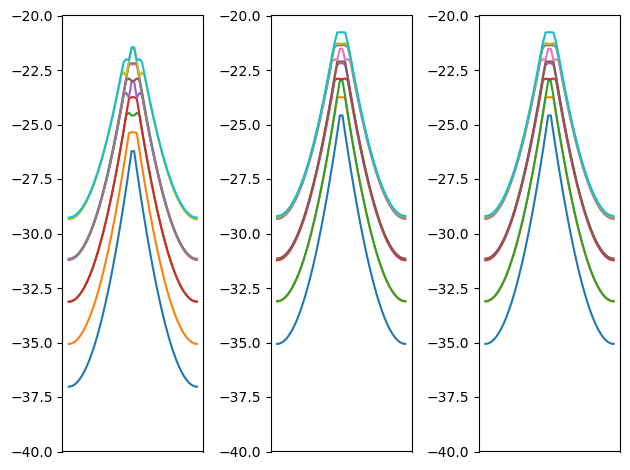

In [141]:
fig, ax = plt.subplots(1,N)

[ax[r].plot(np.array(scan[r])) for r in range(N)];
[ax[r].set_ylim([-40,-20]) for r in range(N)]
[ax[r].set_xticks([]) for r in range(N)]

fig.tight_layout()

## Check block-diagonal form of the Hamiltonian in the symmetric basis (use small N, Ncut)

In [118]:
H_V = []
for i in tqdm(range(N)):
    tmp = []
    for j in range(N):
        tmp.append(V[i].dag()*H*V[j])
    H_V.append(tmp)
H_V = bmat(H_V)

  0%|          | 0/4 [00:00<?, ?it/s]

Text(0.5, 1.0, 'H in the symmetric basis')

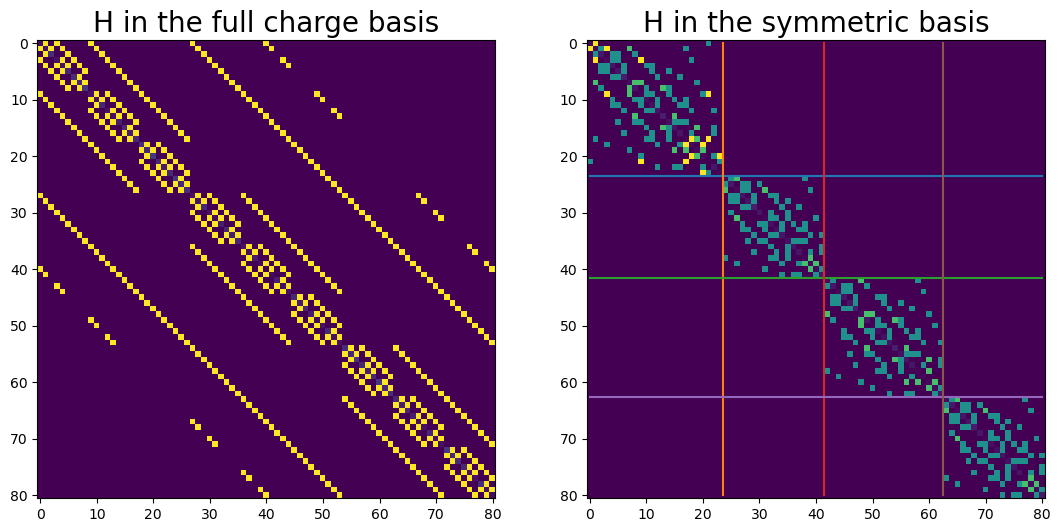

In [119]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,13))


ax1.imshow(np.abs(H.full()))
ax1.set_title('H in the full charge basis', size = 20)

ax2.imshow(np.abs(H_V.toarray()))

sm = V[0].shape[1]
for i in range(1,N):
    ax2.plot(np.arange(0,H.shape[0]),(sm-0.5)*np.ones(H.shape[0]))
    ax2.plot((sm-0.5)*np.ones(H.shape[0]),np.arange(0,H.shape[0]))
    sm = sm + V[i].shape[1]
    
ax2.set_title('H in the symmetric basis', size = 20)